# Introduction:

Audio is an extremely rich data source. Depending on the `sample rate` — the number of points sampled per second to quantify the signal — one second of data could contain thousands of points. Scale this up to hours of recorded audio, and you can see how Machine Learning and Data Science nicely intertwine with signal processing techniques.

This article aims to break down what exactly wave forms are as well as utilize `librosa` in Python for analysis and visualizations — alongside `numpy` and `matplotlib`.

## Wave Forms:

Waves are repeated signals that oscillate and vary in amplitude, depending on their complexity. In the real world, waves are continuous and mechanical — which is quite different from computers being discrete and digital.

So, how do we translate something continuous and mechanical into something that is discrete and digital?

This is where the sample rate defined earlier comes in. Say, for example, the sample rate of the recorded audio is 100. This means that for every recorded second of audio, the computer will place 100 points along the signal in attempts to best “trace” the continuous curve. Once all the points are in place, a smooth curve joins them all together for humans to be able to visualize the sound. Since the recorded audio is in terms of amplitude and time, we can intuitively say that the wave form operates in the time domain.

To better understand what something like this sounds like, we will look at three sounds: a kick drum, a guitar, and a snare drum.

In [1]:
# Import necessary packages
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the wav files. It will be loaded in as a numpy array.
# sr represents the samplerate.
# Since we did not specify the samplerate when loading in the files,
# the default will be set to 22050.
guitar, sr = librosa.load('guitar.wav')
kick, sr = librosa.load('kick.wav')
snare, sr = librosa.load('snare.wav')

Now that the data is loaded in, let’s visualize these sounds.

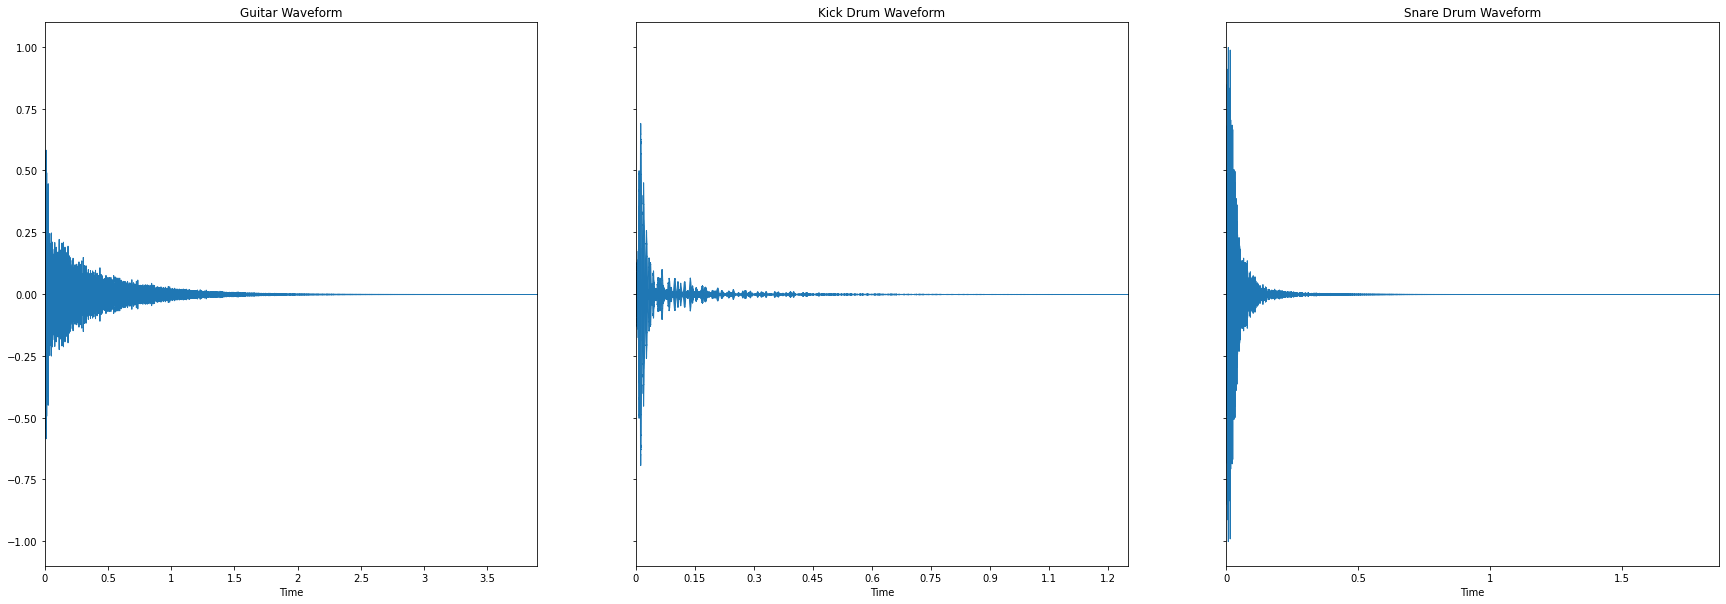

In [3]:
#Visualizing waveforms
fig, ax = plt.subplots(1,3, figsize = (30,10), sharey = True)
librosa.display.waveplot(guitar, sr=sr, ax=ax[0])
ax[0].set(title = 'Guitar Waveform')
librosa.display.waveplot(kick, sr=sr, ax=ax[1])
ax[1].set(title = 'Kick Drum Waveform')
librosa.display.waveplot(snare, sr=sr, ax=ax[2])
ax[2].set(title = 'Snare Drum Waveform')
plt.show()

From the get-go, we see some issues with the visualization.

While we can easily tell some differences between the visualizations, it is not as distinct as we would like it to be. We also know that audio signals do not just suddenly disappear, they in fact fade out until it is impossible to perceive. This means that in terms of audio, this constitutes as null data.

## Null Data in Audio:

There are many ways to treat null audio data in the time domain. However, this approach often is the simplest.

Given the signal and a minimum threshold for the amplitude of the signal:

- Take the absolute value of each point in the signal
- If the point is greater than the threshold, we keep it. Otherwise, we remove it.

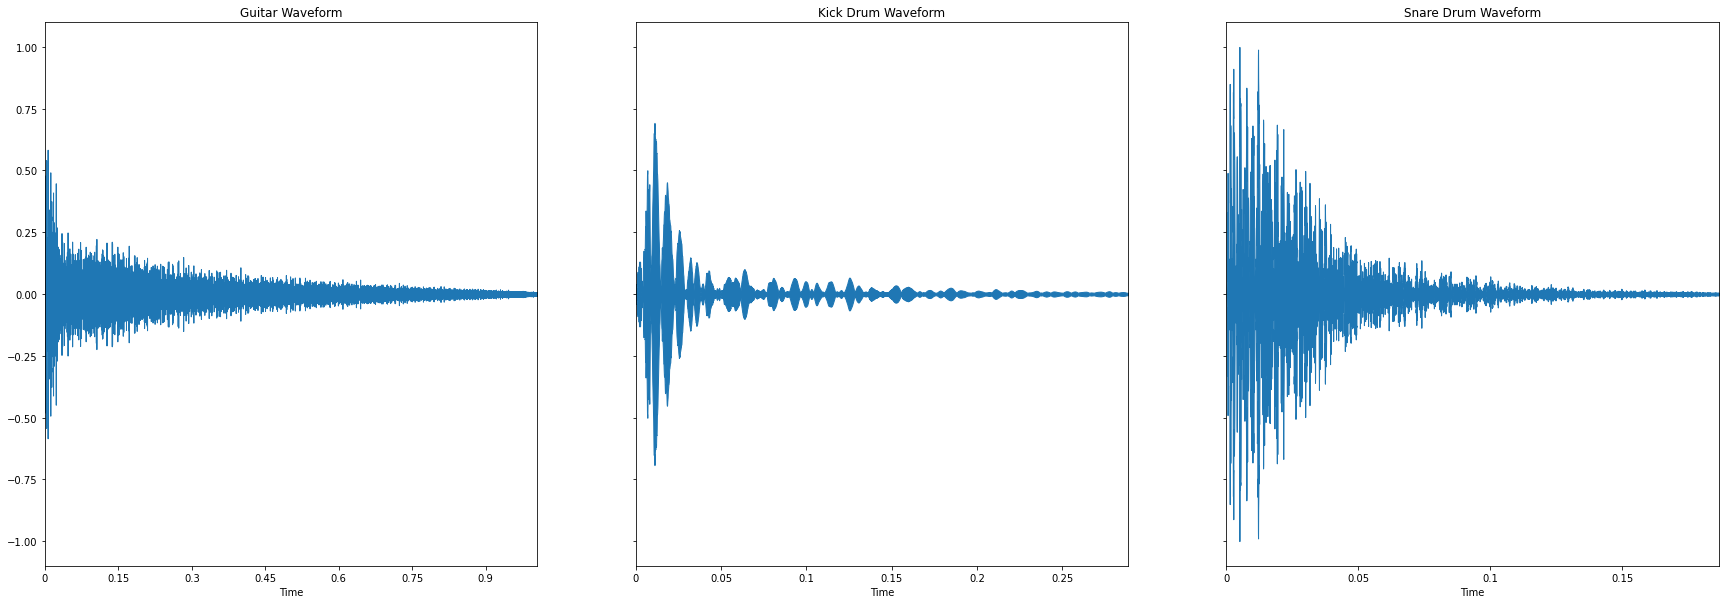

In [4]:
def env_mask(wav, threshold):
    # Absolute value
    wav = np.abs(wav)
    # Point wise mask determination.
    mask = wav > threshold
    return mask
# Initialize mask
g_mask = env_mask(guitar, 0.005)
k_mask = env_mask(kick, 0.005)
s_mask = env_mask(snare, 0.005)
# Plotting the new signals
fig, ax = plt.subplots(1,3, figsize = (30,10), sharey = True)
# Visualize wave plots with mask applied.
librosa.display.waveplot(guitar[g_mask], sr=sr, ax=ax[0])
ax[0].set(title = 'Guitar Waveform')
librosa.display.waveplot(kick[k_mask], sr=sr, ax=ax[1])
ax[1].set(title = 'Kick Drum Waveform')
librosa.display.waveplot(snare[s_mask], sr=sr, ax=ax[2])
ax[2].set(title = 'Snare Drum Waveform')
plt.show()

You can think of thresholds as a sort of parameter for the recordings. Different thresholds work differently for various sounds. Playing around with the threshold is a good way to see how and why this visualization changes.

Now that the null data has been removed from these recordings, it is much easier to see the personality in each sound. The guitar is much more uniform in shape, drowning out gradually with time. The kick drum hits hard in the beginning and quickly drowns out with some remnants of sound remaining. The snare drum is loud and raucous, something you will not want to listen to repeatedly.